In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.08.28']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
916,Afghanistan,22.08.28,192463
1844,Africa,22.08.28,12320236
2760,Albania,22.08.28,328515
3676,Algeria,22.08.28,270194
4586,Andorra,22.08.28,46027
...,...,...,...
208444,Wallis and Futuna,22.08.28,761
209395,World,22.08.28,600867762
210266,Yemen,22.08.28,11925
211160,Zambia,22.08.28,332710


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
916,Afghanistan,22.08.28,192463
2760,Albania,22.08.28,328515
3676,Algeria,22.08.28,270194
4586,Andorra,22.08.28,46027
5478,Angola,22.08.28,102636
...,...,...,...
207765,Vietnam,22.08.28,11403302
208444,Wallis and Futuna,22.08.28,761
210266,Yemen,22.08.28,11925
211160,Zambia,22.08.28,332710


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
200791,United States,22.08.28,94190979
88297,India,22.08.28,44408132
67805,France,22.08.28,34508894
27322,Brazil,22.08.28,34368909
72357,Germany,22.08.28,32041350
199841,United Kingdom,22.08.28,23492875
178060,South Korea,22.08.28,23026960
95646,Italy,22.08.28,21806509
158295,Russia,22.08.28,19123501
97497,Japan,22.08.28,18531986


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
194449,Turkey,22.08.28,16671848
179876,Spain,22.08.28,13332976
145123,Oceania,22.08.28,12106640
207765,Vietnam,22.08.28,11403302
11965,Australia,22.08.28,10005856
...,...,...,...
208444,Wallis and Futuna,22.08.28,761
90141,International,22.08.28,721
205918,Vatican,22.08.28,29
159914,Saint Helena,22.08.28,7


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.08.28', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_9844\2185264298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.08.28', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.08.28,94190979
India,22.08.28,44408132
France,22.08.28,34508894
Brazil,22.08.28,34368909
Germany,22.08.28,32041350
United Kingdom,22.08.28,23492875
South Korea,22.08.28,23026960
Italy,22.08.28,21806509
Russia,22.08.28,19123501


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.08.28,94190979
1,India,22.08.28,44408132
2,France,22.08.28,34508894
3,Brazil,22.08.28,34368909
4,Germany,22.08.28,32041350
5,United Kingdom,22.08.28,23492875
6,South Korea,22.08.28,23026960
7,Italy,22.08.28,21806509
8,Russia,22.08.28,19123501
9,Japan,22.08.28,18531986


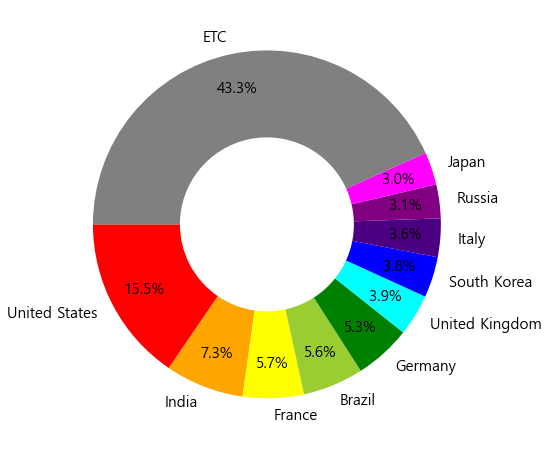

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()